In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier #Import Decsion tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split #to split dataset into training set and testing set
from sklearn import metrics #for accuracies and other metrics
from sklearn.metrics import confusion_matrix #for accuracies and other metrics
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree #tree drawing
import os
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

### link to datasets describtion:
https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017

In [ ]:

results_df = pd.read_csv('results.csv',na_values = '?')
shootouts_df = pd.read_csv('shootouts.csv',na_values = '?')

In [ ]:
results_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [ ]:
shootouts_df.head()

,date,home_team,away_team,winner
0,1967-08-22,India,Taiwan,Taiwan
1,1971-11-14,South Korea,Vietnam Republic,South Korea
2,1972-05-17,Thailand,South Korea,South Korea
3,1972-05-19,Thailand,Cambodia,Thailand
4,1973-07-26,Malaysia,Kuwait,Malaysia


In [ ]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43086 entries, 0 to 43085
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        43086 non-null  object 
 1   home_team   43084 non-null  object 
 2   away_team   43084 non-null  object 
 3   home_score  43081 non-null  float64
 4   away_score  43081 non-null  float64
 5   tournament  43086 non-null  object 
 6   city        43086 non-null  object 
 7   country     43086 non-null  object 
 8   neutral     43084 non-null  object 
dtypes: float64(2), object(7)
memory usage: 3.0+ MB


In [ ]:
shootouts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       444 non-null    object
 1   home_team  444 non-null    object
 2   away_team  444 non-null    object
 3   winner     444 non-null    object
dtypes: object(4)
memory usage: 14.0+ KB


In [ ]:
results_df.isna().sum()

date          0
home_team     2
away_team     2
home_score    5
away_score    5
tournament    0
city          0
country       0
neutral       2
dtype: int64

In [ ]:
results_df.duplicated().sum()

0

### Note here there is outliers in max value

In [ ]:
results_df.describe()

,home_score,away_score
count,43081.000000,43081.000000
mean,1.743228,1.183608
std,1.753982,1.400620
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [ ]:
results_df[results_df['home_score']==results_df['home_score'].max()]
#results_df[results_df['home_score']==results_df['home_score'].max()].date.tolist()[0]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
23917,2001-04-11,Australia,American Samoa,31.0,0.0,FIFA World Cup qualification,Coffs Harbour,Australia,False


In [ ]:
results_df[results_df['away_score']==results_df['away_score'].max()]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
27494,2005-03-11,Guam,North Korea,0.0,21.0,EAFF Championship,Taipei,Taiwan,True


### actually after searching the internet they are true scores according to these links
https://en.wikipedia.org/wiki/Australia_31%E2%80%930_American_Samoa

https://en.wikipedia.org/wiki/North_Korea_national_football_team

### But we will drop these two records to avoid the outliers anyways

In [ ]:
shootouts_df.head()

,date,home_team,away_team,winner
0,1967-08-22,India,Taiwan,Taiwan
1,1971-11-14,South Korea,Vietnam Republic,South Korea
2,1972-05-17,Thailand,South Korea,South Korea
3,1972-05-19,Thailand,Cambodia,Thailand
4,1973-07-26,Malaysia,Kuwait,Malaysia


In [ ]:
shootouts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       444 non-null    object
 1   home_team  444 non-null    object
 2   away_team  444 non-null    object
 3   winner     444 non-null    object
dtypes: object(4)
memory usage: 14.0+ KB


### we will use the both dataframes to generate the datasets with the labels of a specific team which we will figure out later on
#### lets now remove the outliers from both

In [ ]:
home_date = results_df[results_df['home_score']==results_df['home_score'].max()].date.tolist()[0]
away_date = results_df[results_df['away_score']==results_df['away_score'].max()].date.tolist()[0]

In [ ]:
shootouts_df[shootouts_df['date']==home_date]

,date,home_team,away_team,winner


In [ ]:
shootouts_df[shootouts_df['date']==away_date]

,date,home_team,away_team,winner


In [ ]:
results_df[results_df['date']==shootouts_df['date'].min()]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
6611,1967-08-22,Myanmar,Vietnam Republic,3.0,0.0,Merdeka Tournament,Kuala Lumpur,Malaysia,True
6612,1967-08-22,India,Taiwan,1.0,1.0,Merdeka Tournament,Kuala Lumpur,Malaysia,True
6613,1967-08-22,Mexico,Argentina,2.0,1.0,Friendly,Mexico City,Mexico,False


In [ ]:
shootouts_df[shootouts_df.date==shootouts_df.date.min()]

,date,home_team,away_team,winner
0,1967-08-22,India,Taiwan,Taiwan


### we conclude that the outliers is not in the shootouts label dataframe now we need to create the dataset from the both dataframes

In [ ]:
DataSet = pd.DataFrame.merge(shootouts_df,results_df,on=['date','home_team','away_team'],how='inner')

In [ ]:
DataSet.head()

,date,home_team,away_team,winner,home_score,away_score,tournament,city,country,neutral
0,1967-08-22,India,Taiwan,Taiwan,1.0,1.0,Merdeka Tournament,Kuala Lumpur,Malaysia,True
1,1971-11-14,South Korea,Vietnam Republic,South Korea,1.0,1.0,King's Cup,Bangkok,Thailand,True
2,1972-05-17,Thailand,South Korea,South Korea,1.0,1.0,AFC Asian Cup,Bangkok,Thailand,False
3,1972-05-19,Thailand,Cambodia,Thailand,2.0,2.0,AFC Asian Cup,Bangkok,Thailand,False
4,1973-07-26,Malaysia,Kuwait,Malaysia,0.0,0.0,Merdeka Tournament,Kuala Lumpur,Malaysia,False


In [ ]:
DataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        442 non-null    object 
 1   home_team   442 non-null    object 
 2   away_team   442 non-null    object 
 3   winner      442 non-null    object 
 4   home_score  442 non-null    float64
 5   away_score  442 non-null    float64
 6   tournament  442 non-null    object 
 7   city        442 non-null    object 
 8   country     442 non-null    object 
 9   neutral     442 non-null    object 
dtypes: float64(2), object(8)
memory usage: 38.0+ KB


In [ ]:
DataSet.duplicated().sum()

0

In [ ]:
DataSet.isna().sum()

date          0
home_team     0
away_team     0
winner        0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [ ]:
DataSet.describe()

,home_score,away_score
count,442.000000,442.000000
mean,0.895928,0.825792
std,0.837354,0.835149
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,4.000000,4.000000


### looks good for now lets determine the team we will be building the models on

In [ ]:
DataSet['home_team'].unique()

array(['India', 'South Korea', 'Thailand', 'Malaysia', 'Cambodia',
       'Bangladesh', 'Myanmar', 'Algeria', 'Qatar', 'Hong Kong', 'Syria',
       'Libya', 'Kenya', 'Czechoslovakia', 'Tunisia', 'Iran', 'Paraguay',
       'Guinea-Bissau', 'Argentina', 'Gambia', 'Italy', 'Nigeria',
       'Zambia', 'Mali', 'Rwanda', 'Ivory Coast', 'Germany', 'Indonesia',
       'Uganda', 'Senegal', 'Egypt', 'Mauritius', 'Morocco',
       'Sierra Leone', 'Iraq', 'Denmark', 'Ghana', 'Saudi Arabia',
       'Malawi', 'Chad', 'Central African Republic', 'Congo',
       'Mozambique', 'Madagascar', 'Bahrain', 'Brazil', 'Mexico', 'Spain',
       'Gabon', 'Australia', 'DR Congo', 'Equatorial Guinea', 'Ethiopia',
       'Guinea', 'Canada', 'Eswatini', 'China PR', 'United States',
       'Colombia', 'Zimbabwe', 'Republic of Ireland', 'Yugoslavia',
       'Tanzania', 'Cameroon', 'Fiji', 'Netherlands', 'Cuba', 'Japan',
       'Bolivia', 'Martinique', 'Jamaica', 'Burundi', 'Burkina Faso',
       'Romania', 'Antigua a

In [ ]:
counts = []
teams = DataSet['home_team'].unique()
for i in teams:
  counts.append(DataSet[DataSet['home_team']==i].count().tolist()[0])


In [ ]:
teams[counts.index(max(counts))]

'South Africa'

In [ ]:
max(counts)

13

In [ ]:
HomeTeam = teams[counts.index(max(counts))]

In [ ]:
counts = []
teams = DataSet['away_team'].unique()
for i in teams:
  counts.append(DataSet[DataSet['away_team']==i].count().tolist()[0])

In [ ]:
max(counts)

13

In [ ]:
teams[counts.index(max(counts))]

'Uganda'

#### hmm 13 instances will be no good so we will find another way around to enlarge the dataset

In [ ]:
counts = []
teams = results_df['home_team'].unique()
for i in teams:
  counts.append(results_df[results_df['home_team']==i].count().tolist()[0])

In [ ]:
teams[counts.index(max(counts))]

'Brazil'

In [ ]:
max(counts)

585

In [ ]:
results_df[results_df['away_team']=='Brazil'].count().tolist()[0]

421

In [ ]:
counts = []
teams = results_df['away_team'].unique()
for i in teams:
  counts.append(results_df[results_df['away_team']==i].count().tolist()[0])

In [ ]:
teams[counts.index(max(counts))]

'Uruguay'

In [ ]:
max(counts)

551

In [ ]:
results_df[results_df['home_team']=='Uruguay'].count().tolist()[0]

355

### 585 records for home matches and 421 records for away matches for brazil is good enough we will build now the label

In [ ]:
Brazil_Home = results_df[results_df['home_team']=='Brazil']

In [ ]:
Brazil_Away = results_df[results_df['away_team']=='Brazil']

In [ ]:
Brazil_Home.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 585 entries, 441 to 42938
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        585 non-null    object 
 1   home_team   585 non-null    object 
 2   away_team   585 non-null    object 
 3   home_score  585 non-null    float64
 4   away_score  585 non-null    float64
 5   tournament  585 non-null    object 
 6   city        585 non-null    object 
 7   country     585 non-null    object 
 8   neutral     585 non-null    object 
dtypes: float64(2), object(7)
memory usage: 45.7+ KB


In [ ]:
Brazil_Away.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421 entries, 410 to 43045
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        421 non-null    object 
 1   home_team   421 non-null    object 
 2   away_team   421 non-null    object 
 3   home_score  421 non-null    float64
 4   away_score  421 non-null    float64
 5   tournament  421 non-null    object 
 6   city        421 non-null    object 
 7   country     421 non-null    object 
 8   neutral     421 non-null    object 
dtypes: float64(2), object(7)
memory usage: 32.9+ KB


In [ ]:
Brazil_Home.describe()

,home_score,away_score
count,585.000000,585.000000
mean,2.464957,0.815385
std,1.806349,1.005176
min,0.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,1.000000
75%,3.000000,1.000000
max,10.000000,7.000000


In [ ]:
Brazil_Away.describe()

,home_score,away_score
count,421.000000,421.000000
mean,1.016627,1.793349
std,1.178057,1.568303
min,0.000000,0.000000
25%,0.000000,1.000000
50%,1.000000,1.000000
75%,2.000000,3.000000
max,8.000000,8.000000


In [ ]:
Brazil_Home.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
441,1916-07-08,Brazil,Chile,1.0,1.0,Copa América,Buenos Aires,Argentina,True
444,1916-07-12,Brazil,Uruguay,1.0,2.0,Copa América,Buenos Aires,Argentina,True
477,1917-10-12,Brazil,Chile,5.0,0.0,Copa América,Montevideo,Uruguay,True
503,1919-05-11,Brazil,Chile,6.0,0.0,Copa América,Rio de Janeiro,Brazil,False
508,1919-05-18,Brazil,Argentina,3.0,1.0,Copa América,Rio de Janeiro,Brazil,False


In [ ]:
Brazil_Away.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
410,1914-09-20,Argentina,Brazil,3.0,0.0,Friendly,Buenos Aires,Argentina,False
411,1914-09-27,Argentina,Brazil,0.0,1.0,Copa Roca,Buenos Aires,Argentina,False
442,1916-07-10,Argentina,Brazil,1.0,1.0,Copa América,Buenos Aires,Argentina,False
447,1916-07-18,Uruguay,Brazil,0.0,1.0,Friendly,Montevideo,Uruguay,False
472,1917-10-03,Argentina,Brazil,4.0,2.0,Copa América,Montevideo,Uruguay,True


In [ ]:
Winner = []
for h,a in zip(Brazil_Home['home_score'],Brazil_Home['away_score']):

  if(h>a):
    Winner.append(1)
  else:
    Winner.append(0)

In [ ]:
len(Winner)

585

In [ ]:
Brazil_Home.insert(9,'Winner',Winner)

In [ ]:
Brazil_Home.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Winner
441,1916-07-08,Brazil,Chile,1.0,1.0,Copa América,Buenos Aires,Argentina,True,0
444,1916-07-12,Brazil,Uruguay,1.0,2.0,Copa América,Buenos Aires,Argentina,True,0
477,1917-10-12,Brazil,Chile,5.0,0.0,Copa América,Montevideo,Uruguay,True,1
503,1919-05-11,Brazil,Chile,6.0,0.0,Copa América,Rio de Janeiro,Brazil,False,1
508,1919-05-18,Brazil,Argentina,3.0,1.0,Copa América,Rio de Janeiro,Brazil,False,1
512,1919-05-26,Brazil,Uruguay,2.0,2.0,Copa América,Rio de Janeiro,Brazil,False,0
513,1919-05-29,Brazil,Uruguay,1.0,0.0,Copa América,Rio de Janeiro,Brazil,False,1
515,1919-06-01,Brazil,Argentina,3.0,3.0,Friendly,Rio de Janeiro,Brazil,False,0
557,1920-09-18,Brazil,Uruguay,0.0,6.0,Copa América,Viña del Mar,Chile,True,0
610,1921-10-12,Brazil,Paraguay,3.0,0.0,Copa América,Buenos Aires,Argentina,True,1


In [ ]:
Winner = []
for h,a in zip(Brazil_Away['home_score'],Brazil_Away['away_score']):

  if(h<a):
    Winner.append(1)
  else:
    Winner.append(0)

In [ ]:
len(Winner)

421

In [ ]:
Brazil_Away.insert(9,'Winner',Winner)

In [ ]:
Brazil_Away.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Winner
410,1914-09-20,Argentina,Brazil,3.0,0.0,Friendly,Buenos Aires,Argentina,False,0
411,1914-09-27,Argentina,Brazil,0.0,1.0,Copa Roca,Buenos Aires,Argentina,False,1
442,1916-07-10,Argentina,Brazil,1.0,1.0,Copa América,Buenos Aires,Argentina,False,0
447,1916-07-18,Uruguay,Brazil,0.0,1.0,Friendly,Montevideo,Uruguay,False,1
472,1917-10-03,Argentina,Brazil,4.0,2.0,Copa América,Montevideo,Uruguay,True,0


### to conclude what we have done here is that we use the label Winner if 1 then winner if 0 is maybe lost or drawed here we classify winner or not

### now lets see the relationship between the features (columnes) and detect outliers

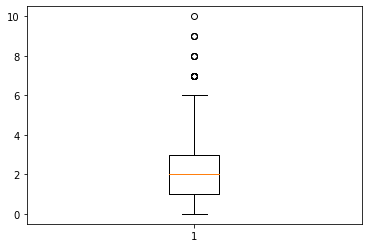

In [ ]:
plt.boxplot(Brazil_Home['home_score'])
plt.rcParams['figure.figsize']=(10,10)
plt.show()

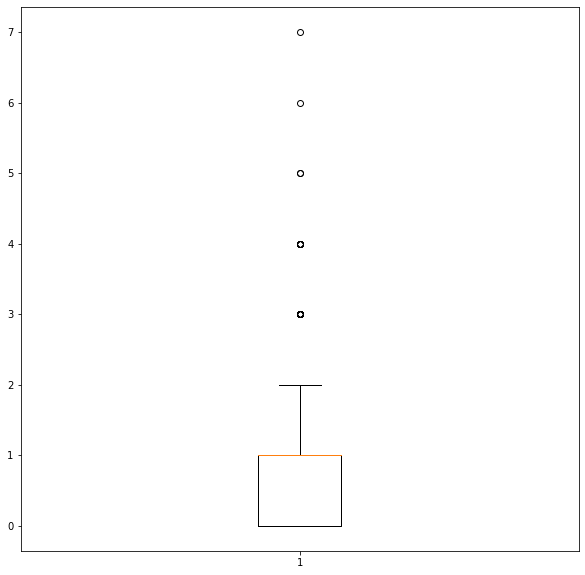

In [ ]:
plt.boxplot(Brazil_Home['away_score'])
plt.rcParams['figure.figsize']=(10,10)
plt.show()

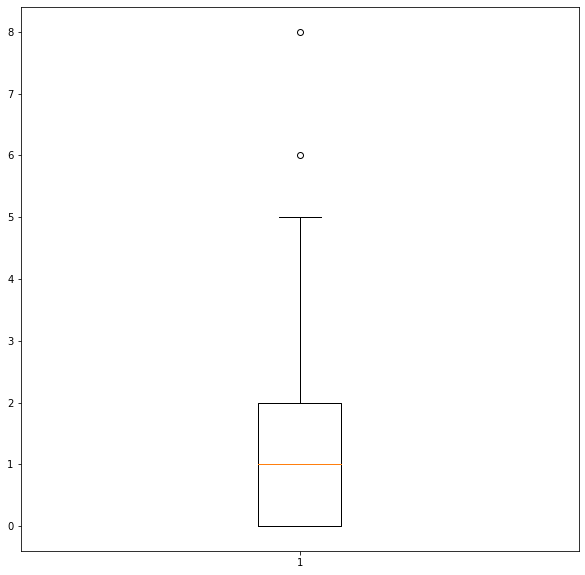

In [ ]:
plt.boxplot(Brazil_Away['home_score'])
plt.rcParams['figure.figsize']=(10,10)
plt.show()

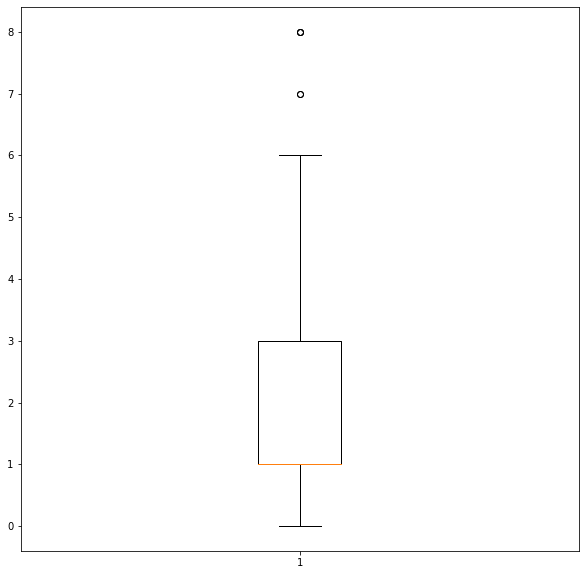

In [ ]:
plt.boxplot(Brazil_Away['away_score'])
plt.rcParams['figure.figsize']=(10,10)
plt.show()

https://stackoverflow.com/questions/38108832/passing-categorical-data-to-sklearn-decision-tree

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(["paris", "paris", "tokyo", "amsterdam"])
le.transform(["tokyo", "tokyo", "paris"]) 

array([2, 2, 1])

In [ ]:
list(le.inverse_transform([2, 2, 1]))

['tokyo', 'tokyo', 'paris']

### we will be in no need for the score and date records as we need to predict if brazil is winner based on other categorical features

In [ ]:
Brazil_Home.drop(columns=['away_score','home_score'],inplace=True)
Brazil_Away.drop(columns=['away_score','home_score'],inplace=True)

In [ ]:
Brazil_Home.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 585 entries, 441 to 42938
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        585 non-null    object
 1   home_team   585 non-null    object
 2   away_team   585 non-null    object
 3   tournament  585 non-null    object
 4   city        585 non-null    object
 5   country     585 non-null    object
 6   neutral     585 non-null    object
 7   Winner      585 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 41.1+ KB


In [ ]:
Brazil_Home.drop(columns=['date'],inplace=True)
Brazil_Away.drop(columns=['date'],inplace=True)

In [ ]:
Brazil_Home.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 585 entries, 441 to 42938
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   home_team   585 non-null    object
 1   away_team   585 non-null    object
 2   tournament  585 non-null    object
 3   city        585 non-null    object
 4   country     585 non-null    object
 5   neutral     585 non-null    object
 6   Winner      585 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 36.6+ KB


In [ ]:
Brazil_Away.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421 entries, 410 to 43045
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   home_team   421 non-null    object
 1   away_team   421 non-null    object
 2   tournament  421 non-null    object
 3   city        421 non-null    object
 4   country     421 non-null    object
 5   neutral     421 non-null    object
 6   Winner      421 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 26.3+ KB


In [ ]:
Brazil_Away['home_team'] = Brazil_Away['home_team'].astype("category")
Brazil_Away['away_team'] = Brazil_Away['away_team'].astype("category")
Brazil_Away['tournament'] = Brazil_Away['tournament'].astype("category")
Brazil_Away['city'] = Brazil_Away['city'].astype("category")
Brazil_Away['country'] = Brazil_Away['country'].astype("category")
Brazil_Away['neutral'] = Brazil_Away['neutral'].astype("category")

In [ ]:
Brazil_Away.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421 entries, 410 to 43045
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   home_team   421 non-null    category
 1   away_team   421 non-null    category
 2   tournament  421 non-null    category
 3   city        421 non-null    category
 4   country     421 non-null    category
 5   neutral     421 non-null    category
 6   Winner      421 non-null    int64   
dtypes: category(6), int64(1)
memory usage: 22.5 KB


In [ ]:
Brazil_Home['home_team'] = Brazil_Home['home_team'].astype("category")
Brazil_Home['away_team'] = Brazil_Home['away_team'].astype("category")
Brazil_Home['tournament'] = Brazil_Home['tournament'].astype("category")
Brazil_Home['city'] = Brazil_Home['city'].astype("category")
Brazil_Home['country'] = Brazil_Home['country'].astype("category")
Brazil_Home['neutral'] = Brazil_Home['neutral'].astype("category")

In [ ]:
Brazil_Home.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 585 entries, 441 to 42938
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   home_team   585 non-null    category
 1   away_team   585 non-null    category
 2   tournament  585 non-null    category
 3   city        585 non-null    category
 4   country     585 non-null    category
 5   neutral     585 non-null    category
 6   Winner      585 non-null    int64   
dtypes: category(6), int64(1)
memory usage: 24.0 KB


### since the home label in Brazil_Home is one value and vise versa in the Brazil_Away dataframes we will drop them

In [ ]:
Brazil_Home.drop(columns=['home_team'],inplace=True)
Brazil_Away.drop(columns=['away_team'],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
Brazil_Home.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 585 entries, 441 to 42938
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   away_team   585 non-null    category
 1   tournament  585 non-null    category
 2   city        585 non-null    category
 3   country     585 non-null    category
 4   neutral     585 non-null    category
 5   Winner      585 non-null    int64   
dtypes: category(5), int64(1)
memory usage: 23.4 KB


In [ ]:
Brazil_Away.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421 entries, 410 to 43045
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   home_team   421 non-null    category
 1   tournament  421 non-null    category
 2   city        421 non-null    category
 3   country     421 non-null    category
 4   neutral     421 non-null    category
 5   Winner      421 non-null    int64   
dtypes: category(5), int64(1)
memory usage: 22.1 KB


In [ ]:
le = preprocessing.LabelEncoder()

In [ ]:
le.fit(Brazil_Away['home_team'])
Brazil_Away['home_team'] = le.transform(Brazil_Away['home_team'])
le.fit(Brazil_Away['tournament'])
Brazil_Away['tournament'] = le.transform(Brazil_Away['tournament'])
le.fit(Brazil_Away['city'])
Brazil_Away['city'] = le.transform(Brazil_Away['city'])
le.fit(Brazil_Away['country'])
Brazil_Away['country'] = le.transform(Brazil_Away['country'])
le.fit(Brazil_Away['neutral'])
Brazil_Away['neutral'] = le.transform(Brazil_Away['neutral'])

In [ ]:
Brazil_Away.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421 entries, 410 to 43045
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   home_team   421 non-null    int64
 1   tournament  421 non-null    int64
 2   city        421 non-null    int64
 3   country     421 non-null    int64
 4   neutral     421 non-null    int64
 5   Winner      421 non-null    int64
dtypes: int64(6)
memory usage: 23.0 KB


In [ ]:
le.fit(Brazil_Home['away_team'])
Brazil_Home['away_team'] = le.transform(Brazil_Home['away_team'])
le.fit(Brazil_Home['tournament'])
Brazil_Home['tournament'] = le.transform(Brazil_Home['tournament'])
le.fit(Brazil_Home['city'])
Brazil_Home['city'] = le.transform(Brazil_Home['city'])
le.fit(Brazil_Home['country'])
Brazil_Home['country'] = le.transform(Brazil_Home['country'])
le.fit(Brazil_Home['neutral'])
Brazil_Home['neutral'] = le.transform(Brazil_Home['neutral'])

In [ ]:
Brazil_Home.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 585 entries, 441 to 42938
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   away_team   585 non-null    int64
 1   tournament  585 non-null    int64
 2   city        585 non-null    int64
 3   country     585 non-null    int64
 4   neutral     585 non-null    int64
 5   Winner      585 non-null    int64
dtypes: int64(6)
memory usage: 32.0 KB


In [ ]:
Brazil_Home.head()

,away_team,tournament,city,country,neutral,Winner
441,10,3,15,0,1,0
444,69,3,15,0,1,0
477,10,3,74,32,1,1
503,10,3,91,3,0,1
508,1,3,91,3,0,1


In [ ]:
Brazil_Away.head()

,home_team,tournament,city,country,neutral,Winner
410,2,9,21,1,0,0
411,2,6,21,1,0,1
442,2,2,21,1,0,0
447,64,9,84,59,0,1
472,2,2,84,59,1,0


## Now Complete Pre processing by normalizing the data and classification

# Decision Tree

In [ ]:
clf = DecisionTreeClassifier() # default decision tree with gini
clf = DecisionTreeClassifier(criterion="entropy",max_depth=5)

### If Brazil is home Team

In [ ]:
x = Brazil_Home.iloc[:,:-1].values #features
y = Brazil_Home.iloc[:,-1].values #labels

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1) # 70% train 30% test


In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
clf = clf.fit(x_train,y_train) #training

In [ ]:
y_pred = clf.predict(x_test) #testing
print('accuracy:',metrics.accuracy_score(y_test,y_pred)*100,'%')

accuracy: 64.77272727272727 %


In [ ]:
confusion_matrix(y_test,y_pred)

array([[  3,  61],
       [  1, 111]])

In [ ]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.05      0.09        64
           1       0.65      0.99      0.78       112

    accuracy                           0.65       176
   macro avg       0.70      0.52      0.43       176
weighted avg       0.68      0.65      0.53       176



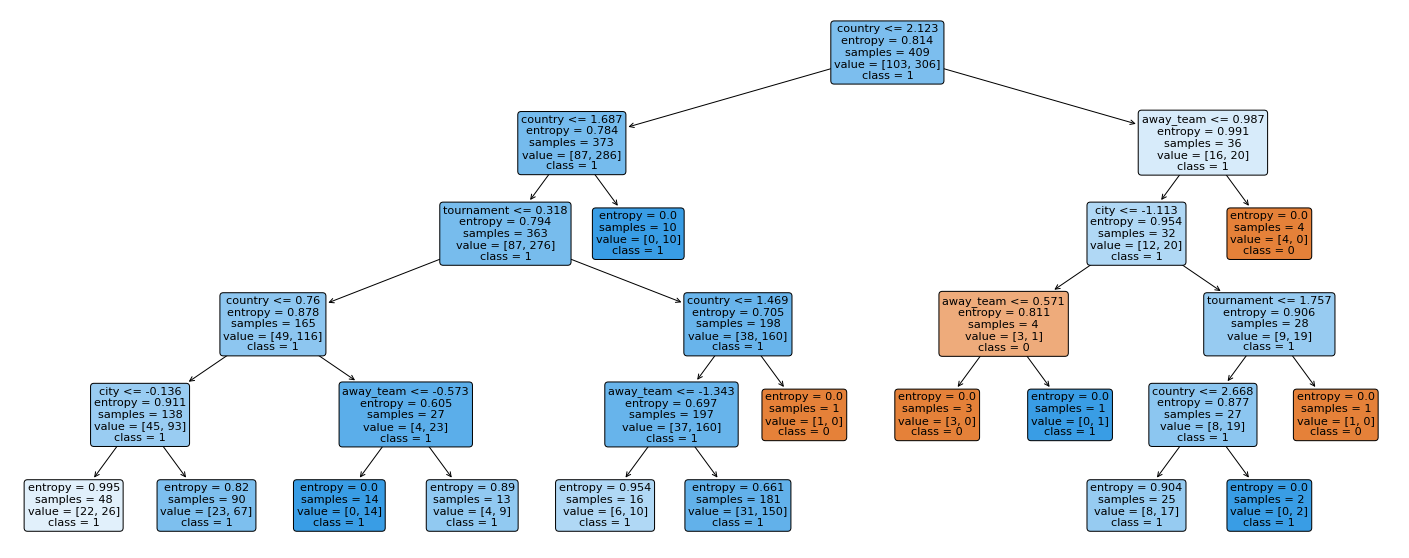

In [ ]:
plt.figure(figsize=(25,10))
a = plot_tree(clf,feature_names=list(Brazil_Home.columns[:-1]),class_names=["0","1"],filled=True,rounded=True)

### If Brazil is away Team

In [ ]:
clf = DecisionTreeClassifier() # default decision tree with gini
clf = DecisionTreeClassifier(criterion="entropy",max_depth=5)

In [ ]:
x = Brazil_Away.iloc[:,:-1].values #features
y = Brazil_Away.iloc[:,-1].values #labels

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1) # 70% train 30% test


In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
clf = clf.fit(x_train,y_train) #training

In [ ]:
y_pred = clf.predict(x_test) #testing
print('accuracy:',metrics.accuracy_score(y_test,y_pred)*100,'%')

accuracy: 62.20472440944882 %


In [ ]:
confusion_matrix(y_test,y_pred)

array([[16, 44],
       [ 4, 63]])

In [ ]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.27      0.40        60
           1       0.59      0.94      0.72        67

    accuracy                           0.62       127
   macro avg       0.69      0.60      0.56       127
weighted avg       0.69      0.62      0.57       127



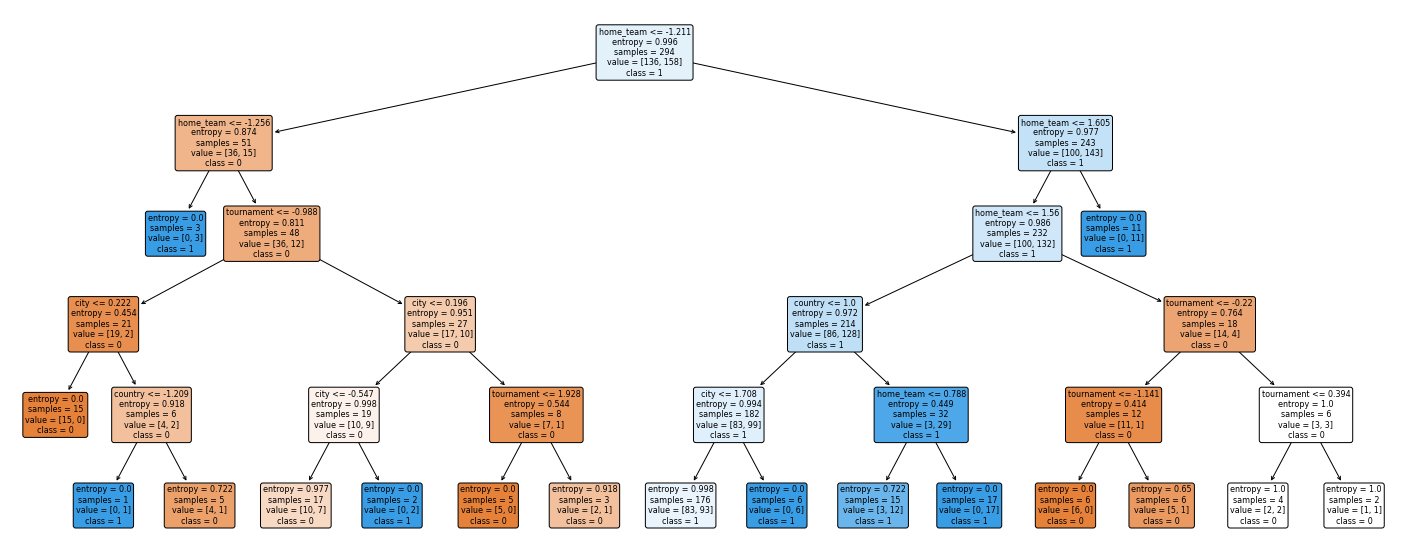

In [ ]:
plt.figure(figsize=(25,10))
a = plot_tree(clf,feature_names=list(Brazil_Away.columns[:-1]),class_names=["0","1"],filled=True,rounded=True)

# Naive Bayes

## As Away

In [ ]:
nv = GaussianNB()


In [ ]:
x = Brazil_Away.iloc[:,:-1].values #features
y = Brazil_Away.iloc[:,-1].values #labels

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1) # 70% train 30% test


In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
nv = nv.fit(x_train,y_train)

In [ ]:
y_pred = clf.predict(x_test) #testing
print('accuracy:',metrics.accuracy_score(y_test,y_pred)*100,'%')

accuracy: 62.20472440944882 %


In [ ]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.27      0.40        60
           1       0.59      0.94      0.72        67

    accuracy                           0.62       127
   macro avg       0.69      0.60      0.56       127
weighted avg       0.69      0.62      0.57       127



## As Home

In [ ]:
nv = GaussianNB()


In [ ]:
x = Brazil_Home.iloc[:,:-1].values #features
y = Brazil_Home.iloc[:,-1].values #labels

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1) # 70% train 30% test


In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
nv = nv.fit(x_train,y_train)

In [ ]:
y_pred = clf.predict(x_test) #testing
print('accuracy:',metrics.accuracy_score(y_test,y_pred)*100,'%')

accuracy: 63.63636363636363 %


In [ ]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        64
           1       0.64      1.00      0.78       112

    accuracy                           0.64       176
   macro avg       0.32      0.50      0.39       176
weighted avg       0.40      0.64      0.49       176



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Neural Network

## As Away

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(5,100,1),max_iter=5000)

In [ ]:
x = Brazil_Away.iloc[:,:-1].values #features
y = Brazil_Away.iloc[:,-1].values #labels

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1) # 80% train 20% test


In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
model = model.fit(x_train,y_train)

In [ ]:
y_pred = model.predict(x_test) #testing
print('accuracy:',metrics.accuracy_score(y_test,y_pred)*100,'%')

accuracy: 55.294117647058826 %


In [ ]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.49      0.49      0.49        37
           1       0.60      0.60      0.60        48

    accuracy                           0.55        85
   macro avg       0.55      0.55      0.55        85
weighted avg       0.55      0.55      0.55        85



## As Home

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(5,5,1),max_iter=700)

In [ ]:
x = Brazil_Home.iloc[:,:-1].values #features
y = Brazil_Home.iloc[:,-1].values #labels

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1) # 80% train 20% test


In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
model = model.fit(x_train,y_train)

In [ ]:
y_pred = model.predict(x_test) #testing
print('accuracy:',metrics.accuracy_score(y_test,y_pred)*100,'%')

accuracy: 61.53846153846154 %


In [ ]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        45
           1       0.62      1.00      0.76        72

    accuracy                           0.62       117
   macro avg       0.31      0.50      0.38       117
weighted avg       0.38      0.62      0.47       117



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Visualize the relation between features

            away_team  tournament      city   country   neutral    Winner
away_team    1.000000   -0.026936 -0.066607 -0.054129  0.034378 -0.038093
tournament  -0.026936    1.000000  0.087067 -0.058725 -0.269540  0.057884
city        -0.066607    0.087067  1.000000 -0.086327 -0.242599  0.021416
country     -0.054129   -0.058725 -0.086327  1.000000  0.676044 -0.043588
neutral      0.034378   -0.269540 -0.242599  0.676044  1.000000 -0.050142
Winner      -0.038093    0.057884  0.021416 -0.043588 -0.050142  1.000000


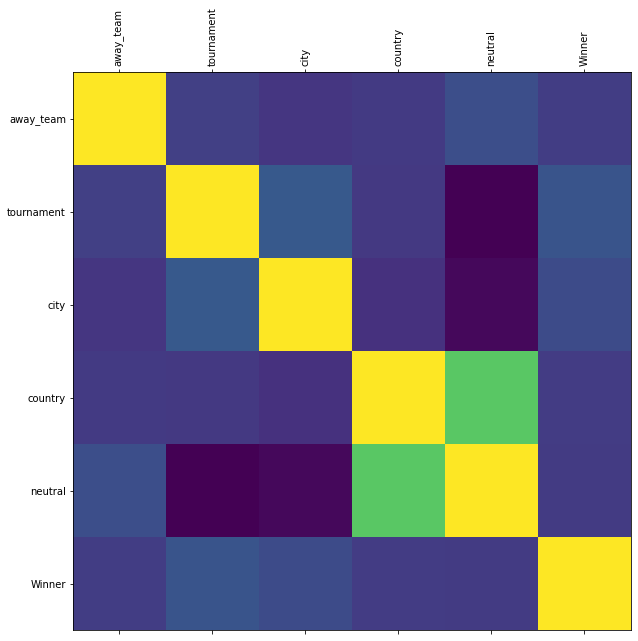

<Figure size 1440x1080 with 0 Axes>

In [ ]:
corr = Brazil_Home.corr()
print(corr)
plt.matshow(corr)
plt.xticks(range(len(corr.columns)),corr.columns,rotation='vertical')
plt.yticks(range(len(corr.columns)),corr.columns)
plt.figure(figsize=(20,15))
plt.show()

            home_team  tournament      city   country   neutral    Winner
home_team    1.000000    0.097955 -0.022879  0.770486 -0.180040  0.128473
tournament   0.097955    1.000000  0.051166  0.049346 -0.165578  0.120002
city        -0.022879    0.051166  1.000000 -0.001938  0.058092  0.106619
country      0.770486    0.049346 -0.001938  1.000000  0.127696  0.158045
neutral     -0.180040   -0.165578  0.058092  0.127696  1.000000  0.075970
Winner       0.128473    0.120002  0.106619  0.158045  0.075970  1.000000


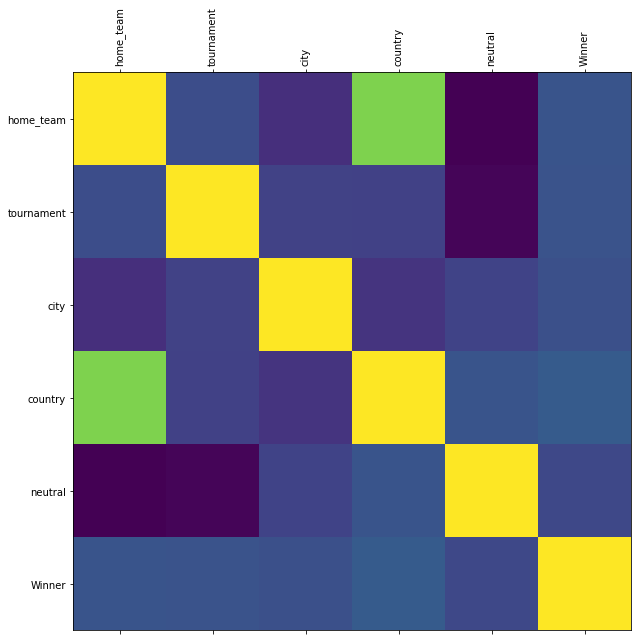

<Figure size 1440x1080 with 0 Axes>

In [ ]:
corr = Brazil_Away.corr()
print(corr)
plt.matshow(corr)
plt.xticks(range(len(corr.columns)),corr.columns,rotation='vertical')
plt.yticks(range(len(corr.columns)),corr.columns)
plt.figure(figsize=(20,15))
plt.show()

## K-NN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
x = Brazil_Home.iloc[:,:-1].values #features
y = Brazil_Home.iloc[:,-1].values #labels
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1) # 80% train 20% test
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
error = []
for i in range(1, 40): 
  knn = KNeighborsClassifier(n_neighbors=i) 
  knn.fit(x_train, y_train) 
  pred_i = knn.predict(x_test) 
  error.append(np.mean(pred_i != y_test)) 

In [ ]:
error.index(min(error))

0

Text(0, 0.5, 'Mean Error')

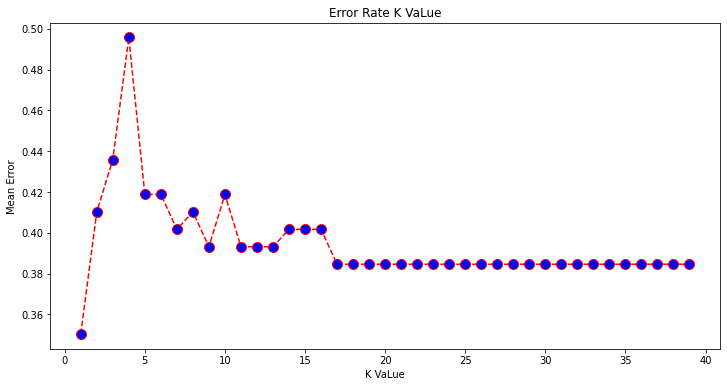

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10) 
plt.title('Error Rate K VaLue') 
plt.xlabel('K VaLue')
plt.ylabel('Mean Error') 

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(x_train,y_train)
y_predict = classifier.predict(x_test)

In [ ]:
print('accuracy:',metrics.accuracy_score(y_test,y_predict)*100,'%')

accuracy: 64.95726495726495 %


In [ ]:
x = Brazil_Away.iloc[:,:-1].values #features
y = Brazil_Away.iloc[:,-1].values #labels
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1) # 80% train 20% test
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
error = []
for i in range(1, 40): 
  knn = KNeighborsClassifier(n_neighbors=i) 
  knn.fit(x_train, y_train) 
  pred_i = knn.predict(x_test) 
  error.append(np.mean(pred_i != y_test)) 

Text(0, 0.5, 'Mean Error')

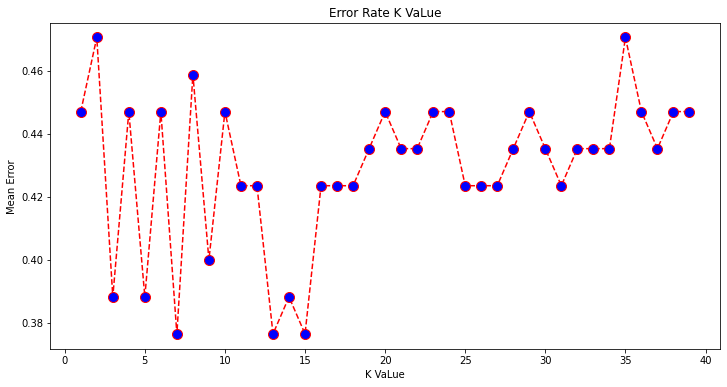

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10) 
plt.title('Error Rate K VaLue') 
plt.xlabel('K VaLue')
plt.ylabel('Mean Error') 

In [ ]:
error.index(min(error))

6

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(x_train,y_train)
y_predict = classifier.predict(x_test)

In [ ]:
print('accuracy:',metrics.accuracy_score(y_test,y_predict)*100,'%')

accuracy: 55.294117647058826 %
